In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from knn import KNN
from sklearn.metrics import accuracy_score,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['targets'] = pd.Series(iris.target)
df['Iris_name'] = df['targets'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets,Iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x_train  , x_test , y_train , y_test = train_test_split(iris.data , iris.target  , test_size= 0.2  , shuffle=True)

In [5]:
print("x , y train :" , x_train.shape , y_train.shape)
print("x , y test  :" , x_test.shape  , y_test.shape)

x , y train : (120, 4) (120,)
x , y test  : (30, 4) (30,)


In [6]:
knn = KNN(7)
knn.fit(x_train , y_train)

In [7]:
acc = knn.evaluate(x_test , y_test)
acc

0.9666666666666667

k|  3 |  5  |  7 |  9  | 11
| --- | --- | --- | --- | --- | --- |
Accuracy  |  0.9333 | 0.9666 | 1.0 | 1.0 | 0.9666

## Calculate confusion matrix for test dataset

In [8]:
print("total data : " , len(iris.data))
print("test  data : " , len(x_test))

total data :  150
test  data :  30


In [9]:
Y_prediction = knn.predict(x_test)
print(Y_prediction)
print(y_test)

[2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2]
[2 1 2 2 1 1 2 1 2 1 2 2 0 0 2 2 0 0 2 2 1 2 2 1 2 2 0 2 2 2]


In [10]:
print("accuracy:", accuracy_score(y_test, Y_prediction))


accuracy: 0.9666666666666667


confusion matrix:
[[ 5  0  0]
 [ 0  7  0]
 [ 0  1 17]]


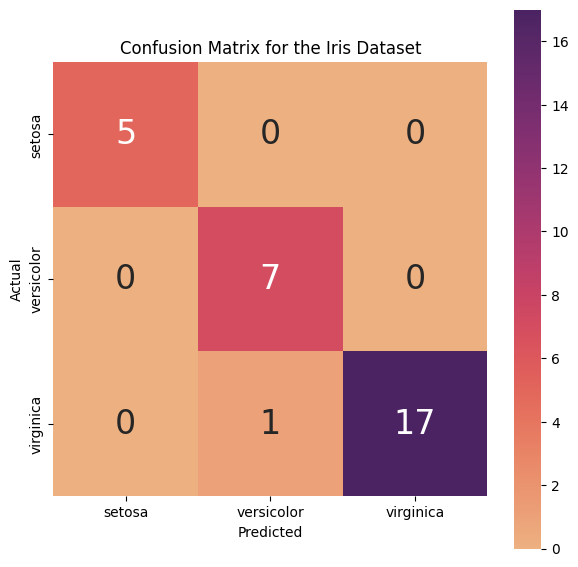

In [11]:
conf_mat = confusion_matrix(y_test, Y_prediction)
print("confusion matrix:", conf_mat, sep="\n")

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax = sns.heatmap(conf_mat, annot=True, square=True , xticklabels=iris.target_names  ,  yticklabels=iris.target_names  ,  fmt='g', cmap="flare" , annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for the Iris Dataset')
plt.show()